In [76]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import trange

plt.rcParams['figure.facecolor'] = 'white'
%matplotlib inline

In [77]:
dataset = pd.read_csv("Goulburn.csv",parse_dates=["Date"])

## Preprocessing Data 

In [78]:
dataset

,Date,Conductivity,PH,Turbidity,Temperature
0,2009-07-06 00:00:00+10:00,66.0,NaN,NaN,9.8
1,2009-07-07 00:00:00+10:00,66.0,6.82,9.7,9.6
2,2009-07-08 00:00:00+10:00,67.0,6.58,9.7,9.3
3,2009-07-09 00:00:00+10:00,67.0,6.63,9.3,9.2
4,2009-07-10 00:00:00+10:00,69.0,6.71,9.6,9.3
...,...,...,...,...,...
4296,2021-04-10 00:00:00+10:00,47.0,7.06,9.0,17.7
4297,2021-04-11 00:00:00+10:00,45.0,7.11,9.6,16.6
4298,2021-04-12 00:00:00+10:00,44.0,7.19,8.8,16.0
4299,2021-04-13 00:00:00+10:00,44.0,7.13,8.6,15.6


In [79]:
#Drop NaN values
dataset1 = dataset.dropna(inplace=False)
dataset1

,Date,Conductivity,PH,Turbidity,Temperature
1,2009-07-07 00:00:00+10:00,66.0,6.82,9.7,9.6
2,2009-07-08 00:00:00+10:00,67.0,6.58,9.7,9.3
3,2009-07-09 00:00:00+10:00,67.0,6.63,9.3,9.2
4,2009-07-10 00:00:00+10:00,69.0,6.71,9.6,9.3
5,2009-07-11 00:00:00+10:00,71.0,6.77,10.0,9.5
...,...,...,...,...,...
4296,2021-04-10 00:00:00+10:00,47.0,7.06,9.0,17.7
4297,2021-04-11 00:00:00+10:00,45.0,7.11,9.6,16.6
4298,2021-04-12 00:00:00+10:00,44.0,7.19,8.8,16.0
4299,2021-04-13 00:00:00+10:00,44.0,7.13,8.6,15.6


In [80]:
dataset1.index = dataset1.Date.copy()

<AxesSubplot:xlabel='Date'>

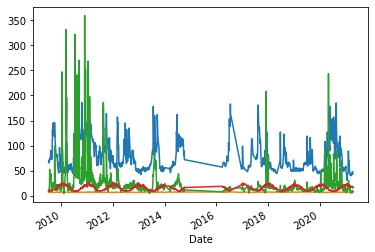

In [81]:
## Plot time series
dataset1.Conductivity.plot()
dataset1.PH.plot()
dataset1.Turbidity.plot()
dataset1.Temperature.plot()

In [82]:
dataset1['PH_norm'] = (dataset1.PH - dataset1.PH.mean())/dataset1.PH.std()
dataset1['Conduct_norm'] = (dataset1.Conductivity - dataset1.Conductivity.mean())/dataset1.Conductivity.std()
dataset1['Temp_norm'] = (dataset1.Temperature - dataset1.Temperature.mean())/dataset1.Temperature.std()
dataset1['Turb_norm'] = (dataset1.Turbidity - dataset1.Turbidity.mean())/dataset1.Turbidity.std()

/anaconda3/envs/env_pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/env_pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/env_pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [83]:
dataset1

,Date,Conductivity,PH,Turbidity,Temperature,PH_norm,Conduct_norm,Temp_norm,Turb_norm
Date,,,,,,,,,
2009-07-07 00:00:00+10:00,2009-07-07 00:00:00+10:00,66.0,6.82,9.7,9.6,-0.831885,-0.424352,-1.343368,-0.517130
2009-07-08 00:00:00+10:00,2009-07-08 00:00:00+10:00,67.0,6.58,9.7,9.3,-1.676229,-0.390683,-1.410164,-0.517130
2009-07-09 00:00:00+10:00,2009-07-09 00:00:00+10:00,67.0,6.63,9.3,9.2,-1.500324,-0.390683,-1.432429,-0.531325
2009-07-10 00:00:00+10:00,2009-07-10 00:00:00+10:00,69.0,6.71,9.6,9.3,-1.218876,-0.323344,-1.410164,-0.520679
2009-07-11 00:00:00+10:00,2009-07-11 00:00:00+10:00,71.0,6.77,10.0,9.5,-1.007790,-0.256005,-1.365633,-0.506484
...,...,...,...,...,...,...,...,...,...
2021-04-10 00:00:00+10:00,2021-04-10 00:00:00+10:00,47.0,7.06,9.0,17.7,0.012458,-1.064070,0.460135,-0.541972
2021-04-11 00:00:00+10:00,2021-04-11 00:00:00+10:00,45.0,7.11,9.6,16.6,0.188363,-1.131409,0.215215,-0.520679
2021-04-12 00:00:00+10:00,2021-04-12 00:00:00+10:00,44.0,7.19,8.8,16.0,0.469811,-1.165078,0.081622,-0.549069


## Density Plots

<AxesSubplot:ylabel='Density'>

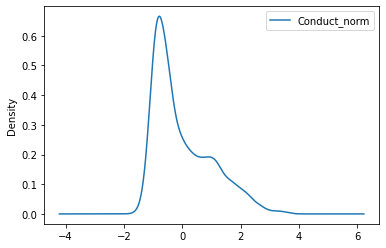

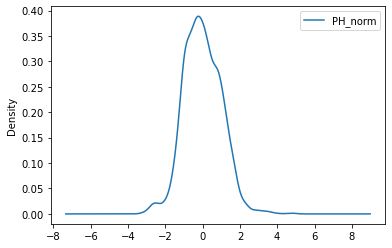

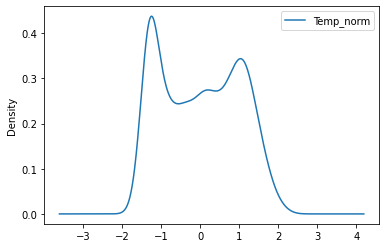

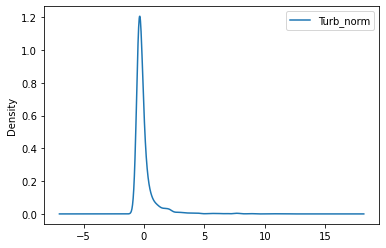

In [84]:
#Plot dataset
pd.DataFrame(dataset1.Conduct_norm).plot(kind='density')
pd.DataFrame(dataset1.PH_norm).plot(kind='density')
pd.DataFrame(dataset1.Temp_norm).plot(kind='density')
pd.DataFrame(dataset1.Turb_norm).plot(kind='density')

In [85]:
#tensor is multi-dimensional matrix containing elements of a single data type
covariates = ['PH_norm','Turb_norm','Temp_norm']
conductivity = dataset1['Conduct_norm']
data_points = torch.from_numpy(np.stack([dataset1[a] for a in covariates], axis=1)).float()
data_targets = torch.from_numpy(np.stack(conductivity)).float()

n_data_entries = conductivity.shape[0]
n_data_dim = len(covariates)
n_data = len(dataset1)

In [86]:
# Split training and test sets
train_frac = 0.7
n_train = int(train_frac * n_data_entries)
n_test = n_data - n_train
train_points = data_points[:n_train]
train_targets = data_targets[:n_train]
test_points = data_points[n_train:]
test_targets = data_targets[n_train:]

/anaconda3/envs/env_pytorch/lib/python3.6/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


(-4.0, 5.0, -2.0, 12.0)

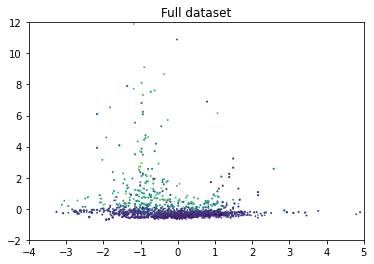

In [87]:
extent = [-4, 5, -2, 12]
plt.scatter(data_points[:, 0], data_points[:, 1], data_points[:, 2], c=data_targets)
plt.title("Full dataset")
plt.axis(extent)

(-4.0, 5.0, -2.0, 12.0)

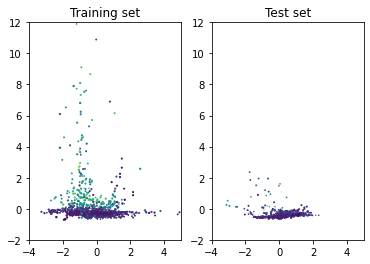

In [88]:
plt.subplot(121)
plt.scatter(train_points[:, 0], train_points[:, 1], train_points[:, 2], c=train_targets)
plt.title("Training set")
plt.axis(extent)

plt.subplot(122)
plt.scatter(test_points[:, 0], test_points[:, 1], test_points[:, 2], c=test_targets)
plt.title("Test set")
plt.axis(extent)

## Neural Networks to predict

In [122]:
# Prepare the input tensor (x1, x2, x3).
xx = train_points
y = train_targets

We use nn package to implement our neural network.
nn.Sequential is a module that contains other modules and applies them in sequence to generate output.
nn.Linear computes output from input in a linear function.
nn.Flattern flattens the output of the linear layer to match the shape of output 'y'

In [124]:
# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')
# We use optim package to find an Optimizer that will update the model weights after each iteration
# EMSprop includes the first argument that let us tell which Tensors the optimizer should update

learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x1 + {linear_layer.weight[:, 1].item()} x2 + {linear_layer.weight[:, 2].item()} x3')

99 2302.14453125
199 2055.412109375
299 1899.882080078125
399 1791.5555419921875
499 1718.336181640625
599 1673.91015625
699 1651.8062744140625
799 1644.1395263671875
899 1642.7601318359375
999 1642.6812744140625
1099 1642.6800537109375
1199 1642.6810302734375
1299 1642.6815185546875
1399 1642.681640625
1499 1642.681396484375
1599 1642.681396484375
1699 1642.681640625
1799 1642.681884765625
1899 1642.6822509765625
1999 1642.68212890625
Result: y = 0.09603166580200195 + -0.07554839551448822 x1 + 0.3829163610935211 x2 + -0.3151398003101349 x3


In [64]:
single_pt = np.array([1,0,0])
result = sigmoid(np.dot(single_pt, weights) + bias)
print(result)

[0.]
/anaconda3/envs/env_pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [24]:
n_it = 50
iterator = trange(n_it) if verbose else range(n_it)
    for t in iterator:
        loss = calculate_loss(model, train_points, train_targets)
        new_model[t] = build_model(train_points, train_targets, 1, num_passes=20000, print_loss=False)
        #solve backward for sets of parameters from the models
        covariance = np.cov()
    return new_model

#With new targets Y and same train points * 50 times
build_model(train_points, new_targets, 1, num_passes=20000, print_loss=False) #to get params 

#Calc cov function, mean of new sets of parameters
K_params = covariance(build_model1,..,50)
m_params = mean 
dimension = 2

z_params = np.random.multivariate_normal(mean=m.reshape(d,), cov=K, size=100)
y_params = np.transpose(z)
# Plot density function.
sns.jointplot(x=y_params[0], y=y_params[1], kind="kde", space=0)

MC_output = predict(model,y_params, data_points)
tenthperc = np.percentile(MC_output,10)
ninetyperc = np.percentile(MC_output,90)
mean = np.mean(MC_output)

TypeError: dot(): argument 'tensor' (position 1) must be Tensor, not numpy.ndarray

In [ ]:
## combine these different collections into a list    
data_to_plot = [MC_output]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))
# Create an axes instance
ax = fig.add_subplot(111)
# Create the boxplot
bp = ax.boxplot(data_to_plot)
# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

## to get fill color
bp = ax.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

## Custom x-axis labels
ax.set_xticklabels(['Sample1', 'Sample2', 'Sample3', 'Sample4'])

## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()